In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Week 5
We begin by using the function from class exercises. To recap, we consider Newton's Law of Gravitation, which states that a force between two objects, exterted on the first object
$$
\begin{equation} \vec{F} = \frac{GMm}{r^2} \hat{r} \end{equation}
$$
where $G$ is the gravitational constant, $M$ and $m$ are the masses of the objects, $r = |\vec{r_{12}}|$, $\hat{r} = \frac{\vec{r_{12}}}{|\vec{r_{12}}|}$, and $\vec{r_{12}} = \vec{r_2} - \vec{r_1}$.

In [19]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force on a mass m1 at position r1
    from a mass m2 at position r2
    
    Inputs
    r1        Position of the first mass
    r2        Position of the second mass
    m1        First mass
    m2        Second mass

    Returns
    f_on_m1   Force on m1 as a result of m2    
    """
    # Find r_12 and its magnitude
    r_12 = r2 - r1
    f_on_m1 = (G * m1 * m2)/(np.sqrt(r_12[0]**2 + r_12[1]**2))**3 * r_12
    return f_on_m1

In [20]:
G = 1
m1 = 1
m2 = 3e-6
m3 = 3.6e-8
Ndim = 2     #2D problem for now
Nsteps = 20000
dt = 0.01

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

# Initial conditions
r2[0] = np.array((1.0, 0))
r3[0] = np.array((1.0, 0.025)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((-np.sqrt(G*m3/0.025), 0)) + v2[0]


Using $\mathrm{(1)}$, equating this to the equation for the formula for centripetal force
$$ \begin{equation} \vec{F} = \frac{mv^2}{r}\hat{r} \end{equation} $$
and rearranging, one obtains an expression for tangential velocity 

$$ \begin{equation} v = \sqrt{\frac{GM}{r}}. \end{equation} $$

In the example below, the initial velocity of planet 2 is determined by this (assuming that planet 1 is fixed at the centre). Then, the same is calculated for planet 3 but with the centre of the orbit fixed on planet 2, and the initial velocity of planet 2 is added to this. If this is successful, planet 2's frame of reference should show planet 3 orbiting with a circular orbit.

In [21]:
for i in range(Nsteps-1):
    # Finding forces on masses at this timestep
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) + force(r3[i], r1[i], m3, m1)

    # Updating positions using velocity Verlet
    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    # Finding forces at new timestep 
    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) + force(r3[i+1], r1[i+1], m3, m1)

    # Updating velocities using velocity Verlet
    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



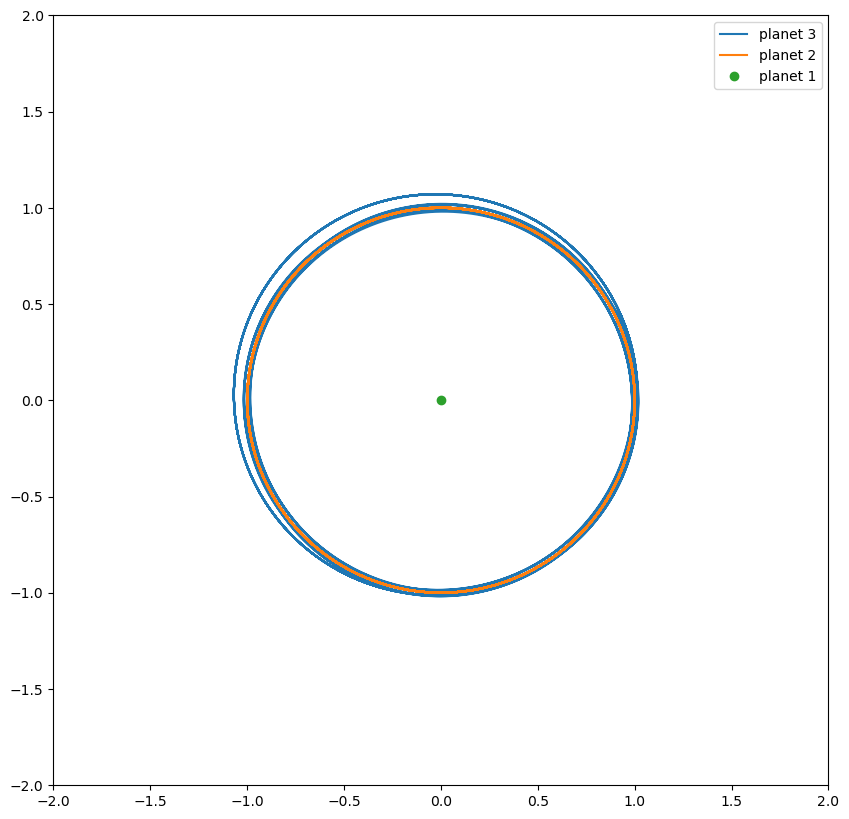

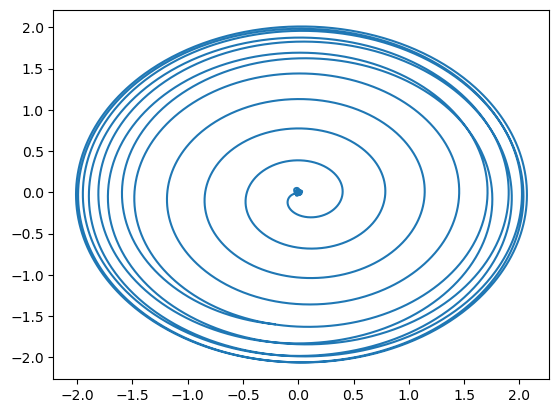

In [36]:
plt.figure(figsize=(10,10))
plt.plot(r3[:,0], r3[:,1], label='planet 3')
plt.plot(r2[:,0], r2[:,1], label='planet 2')
plt.plot(0, 0, 'o', label='planet 1')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()

plt.figure()
plt.plot(r2[:,0]-r3[:,0], r2[:,1]-r3[:,1], label='planet 2')

The plot of relative velocity should be a perfect circle, not a spiral. There must be some problems with initial conditions.

In [25]:
def RK4_solver(fun,y0,dt,N):
    """Solve dy/dt = fun(y,t) using fourth-order RK method.
    Inputs:
    fun  f(y,t)
    y0   Initial condition - assumed to be two-component
    dt   Step size
    N    Number of steps
    Returns: two arrays of length N+1 (x and v or equivalent)
    """
    # Storage for solution
    y = np.zeros((N+1,2,2))
    # Initial condition
    y[0] = y0
    t = 0
    for i in range(N):
        # RK4 formulae
        k1 = dt*fun(y[i],t)
        k2 = dt*fun(y[i]+0.5*k1,t+0.5*dt)
        k3 = dt*fun(y[i]+0.5*k2,t+0.5*dt)
        k4 = dt*fun(y[i]+k3,t+dt)
        y[i+1]=y[i]+(k1+2*k2+2*k3+k4)/6
        t += dt
    return y

In [26]:
def p2_RHS(y,t):
    m1 = 1.0
    r12 = np.array([0,0]) - y[0]
    r12_mag_cubed = np.linalg.norm(r12)**3

    pos = y[0]
    vel = y[1]
    
    dpos = vel
    dvel = G*m1*r12/r12_mag_cubed

    return np.array([dpos,dvel])

def p3_RHS(y,t):
    m1 = 1
    m2 = 3e-6
    r23 = p2_results[int(t),0] - y[0]
    r23_mag_cubed = np.linalg.norm(r23)**3

    r13 = np.array([0,0]) - y[0]
    r13_mag_cubed = np.linalg.norm(r13)**3

    pos = y[0]
    vel = y[1]
    
    dpos = vel
    dvel = G*m2*r23/r23_mag_cubed + G*m1*r13/r13_mag_cubed

    return np.array([dpos,dvel])

In [35]:
p2_initial_pos = np.array([1,0])
p2_initial_vel = np.array([0,1])

p3_initial_pos = np.array([1,0.0025])
p3_initial_vel = np.array([-np.sqrt(G*m2/0.0025),1])

N = 200
dt = 0.1
p2_y_0 = np.array([p2_initial_pos, p2_initial_vel])
p3_y_0 = np.array([p3_initial_pos, p3_initial_vel])

p2_results = RK4_solver(p2_RHS, p2_y_0, dt, N)
p3_results = RK4_solver(p3_RHS, p3_y_0, dt, N)

print(p2_results[0])
print(p3_results[0])

[[1. 0.]
 [0. 1.]]
[[ 1.          0.0025    ]
 [-0.03464102  1.        ]]


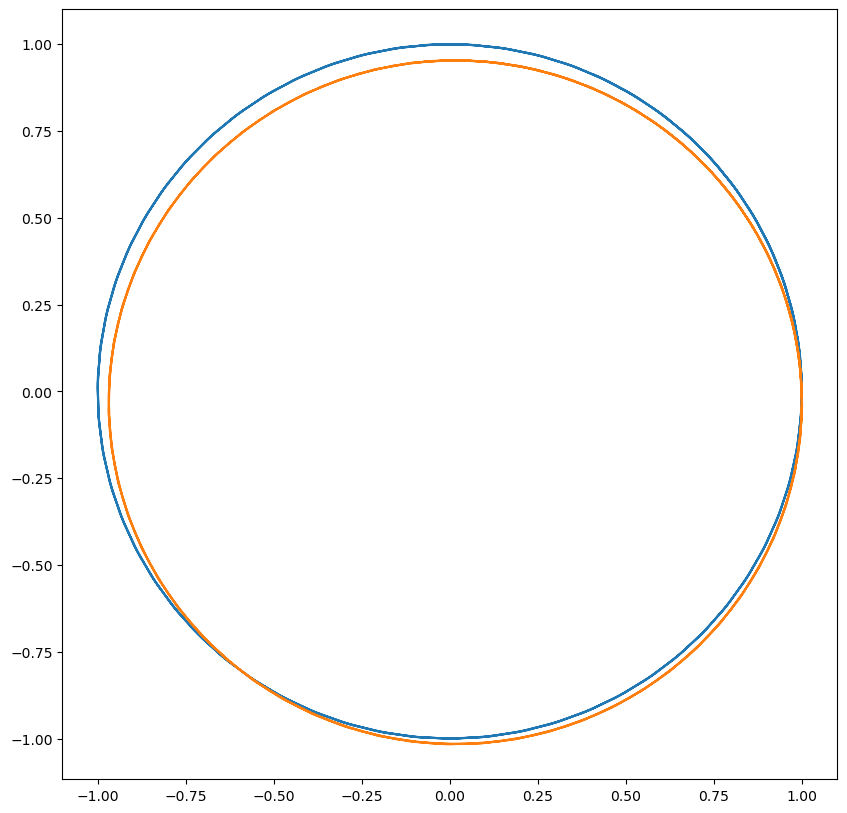

In [33]:
plt.figure(figsize=(10,10))
plt.plot(p2_results[:,0,0], p2_results[:,0,1])
plt.plot(p3_results[:,0,0], p3_results[:,0,1])
#plt.plot(p3_results[:,0,0] - p2_results[:,0,0], p3_results[:,0,1] - p2_results[:,0,1])